In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scanpy as sc

from sciso.plot import *

Set plot style

In [2]:
set_nature_style()

## Set paths

In [3]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220322_AB_DKFZHypoxia") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "hypoxia_adata_concat_gfp_cond.h5ad"
adata_am_path =anndata_dir / "hypoxia_adata_am_concat.h5ad"
# adata_path = anndata_dir /"hypoxia_adata_concat_fit.h5ad"

# Output
plots_path = Path(data_dir / "classification_plots")
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

## Load anndata

In [4]:
adata = sc.read_h5ad(adata_path)

In [5]:
print("All ions:")
print(adata.var.unlabeled_annotation_id.unique())

All ions:
['C18H36O2-H', 'C18H34O2-H', 'C16H32O2-H', 'C16H30O2-H', 'C14H28O2-H']
Categories (5, object): ['C18H36O2-H', 'C18H34O2-H', 'C16H32O2-H', 'C16H30O2-H', 'C14H28O2-H']


## Fit binomial

In [6]:
adata.obs.index

Index(['24-S2W1-0', '27-S2W1-0', '28-S2W1-0', '29-S2W1-0', '30-S2W1-0',
       '31-S2W1-0', '32-S2W1-0', '33-S2W1-0', '34-S2W1-0', '35-S2W1-0',
       ...
       '870-S3W8-1', '872-S3W8-1', '875-S3W8-1', '876-S3W8-1', '877-S3W8-1',
       '878-S3W8-1', '881-S3W8-1', '882-S3W8-1', '886-S3W8-1', '888-S3W8-1'],
      dtype='object', name='cell_id', length=4291)

In [7]:
fit_binomial_adata(adata)

Ion: C18H36O2-H


/media/buglakova/Extreme SSD/isotope_tracing_backup/code/13C-SpaceM/sciso/plot.py:234: RuntimeWarning: invalid value encountered in divide
  iso_dist_even = (iso_dist_even / np.sum(iso_dist_even))


Ion: C18H34O2-H
Ion: C16H32O2-H
Ion: C16H30O2-H
Ion: C14H28O2-H


In [8]:
output_file = anndata_dir / "hypoxia_adata_concat_fit.h5ad"
adata.write(output_file.with_suffix(".h5ad"))

## Plot distribtuion of some features

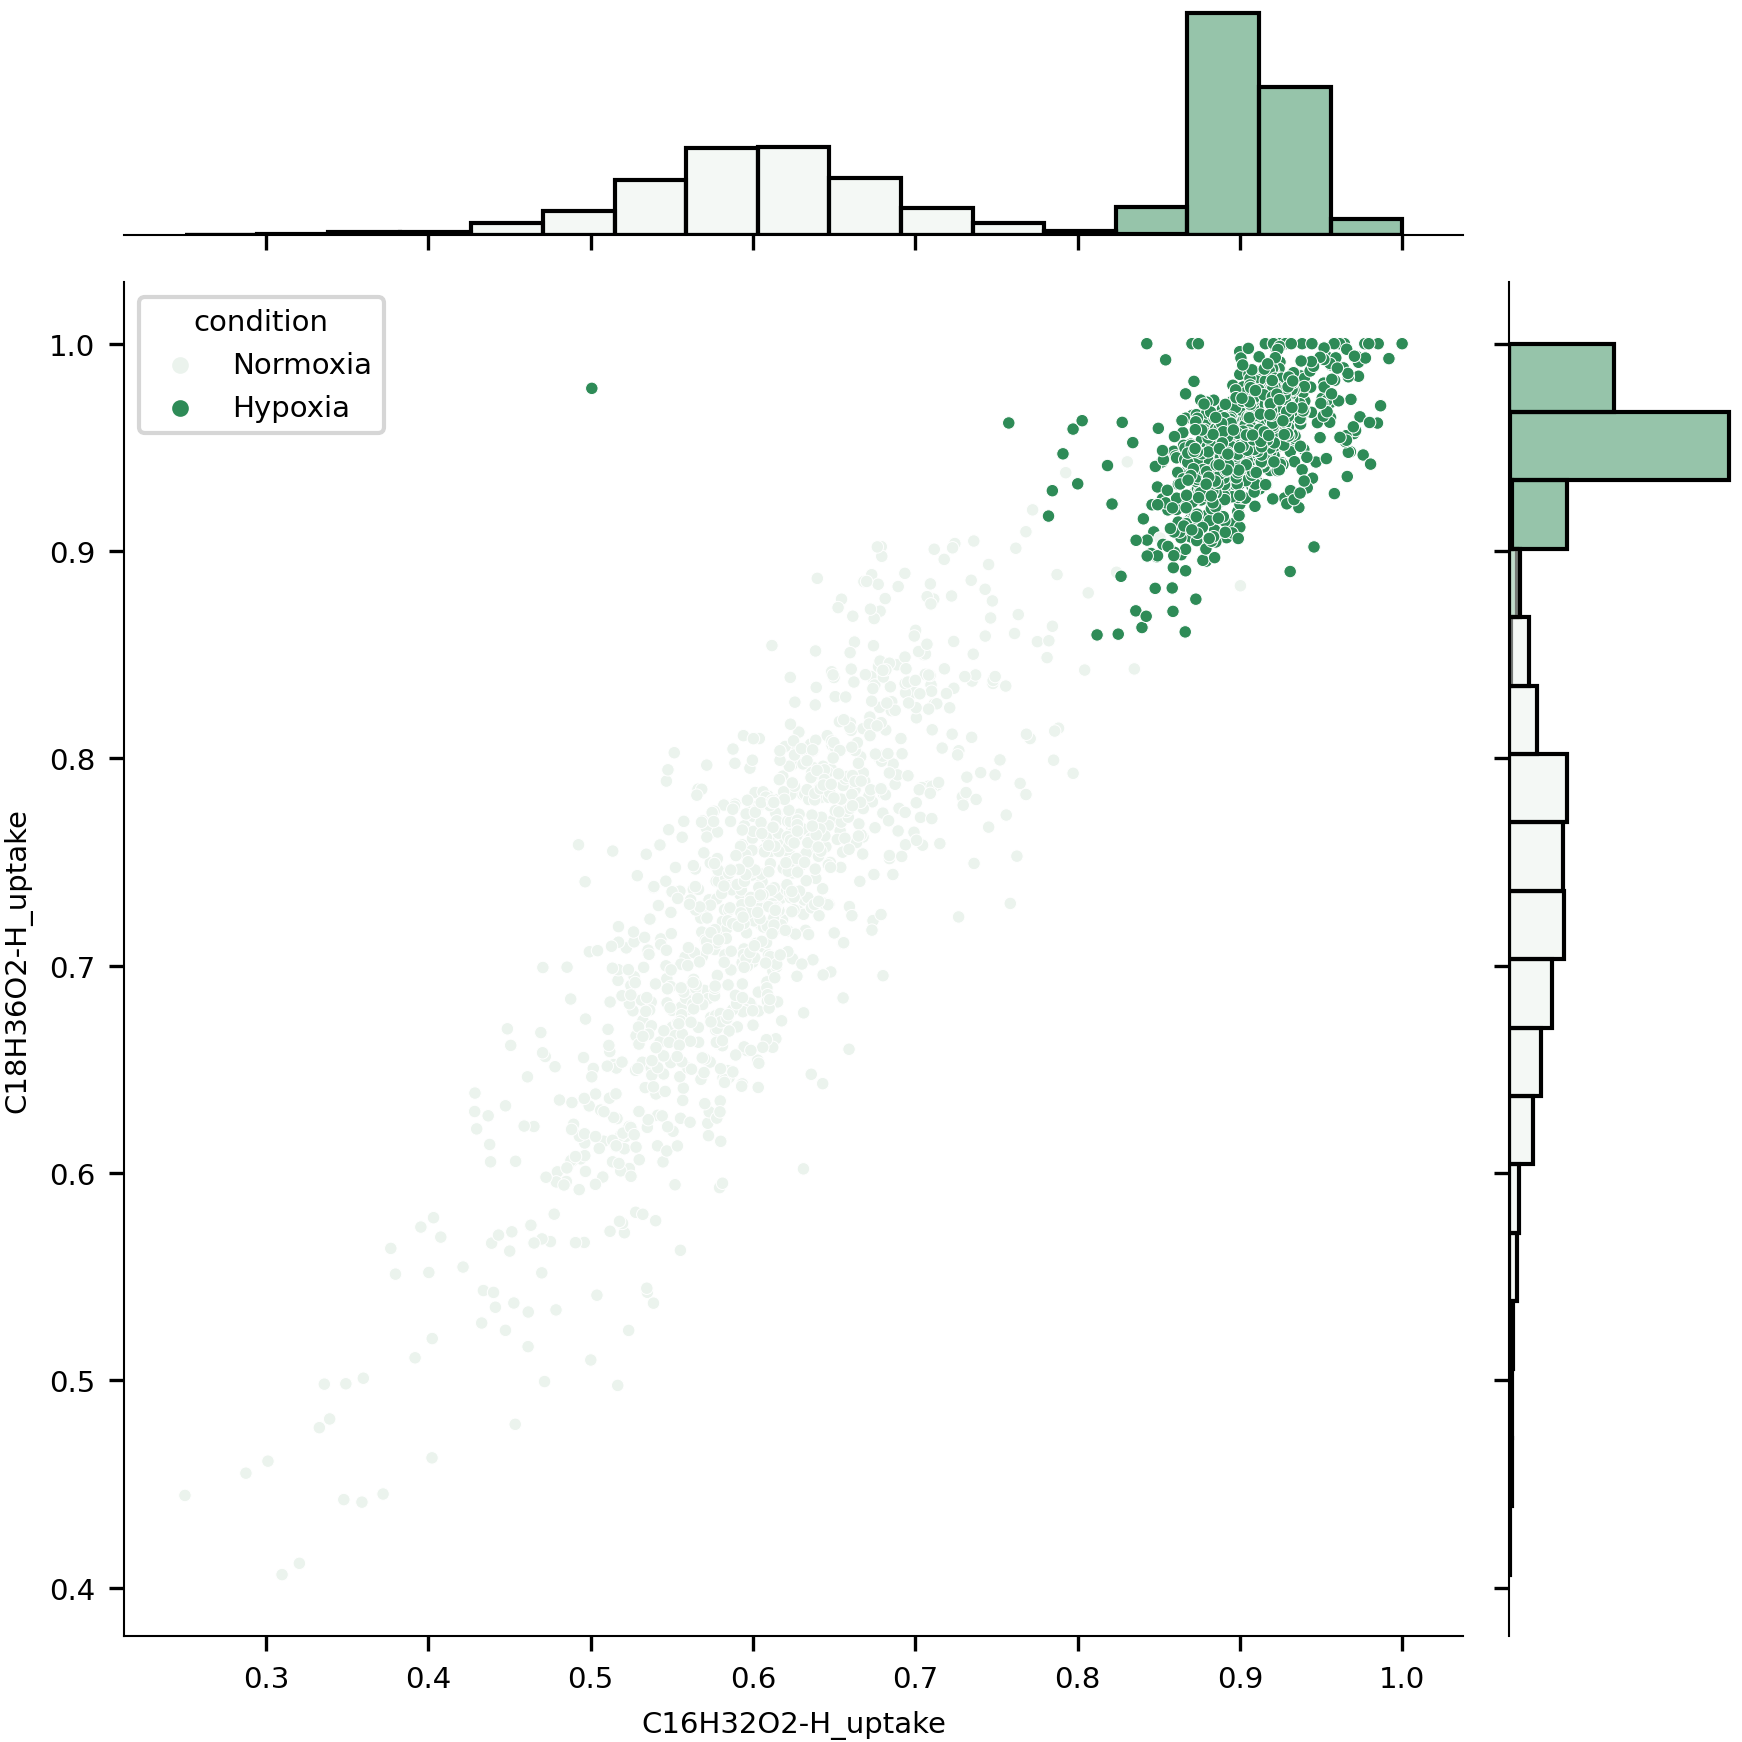

In [9]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition", palette=sns.light_palette("seagreen", 2), hue_order=["Normoxia", "Hypoxia"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))


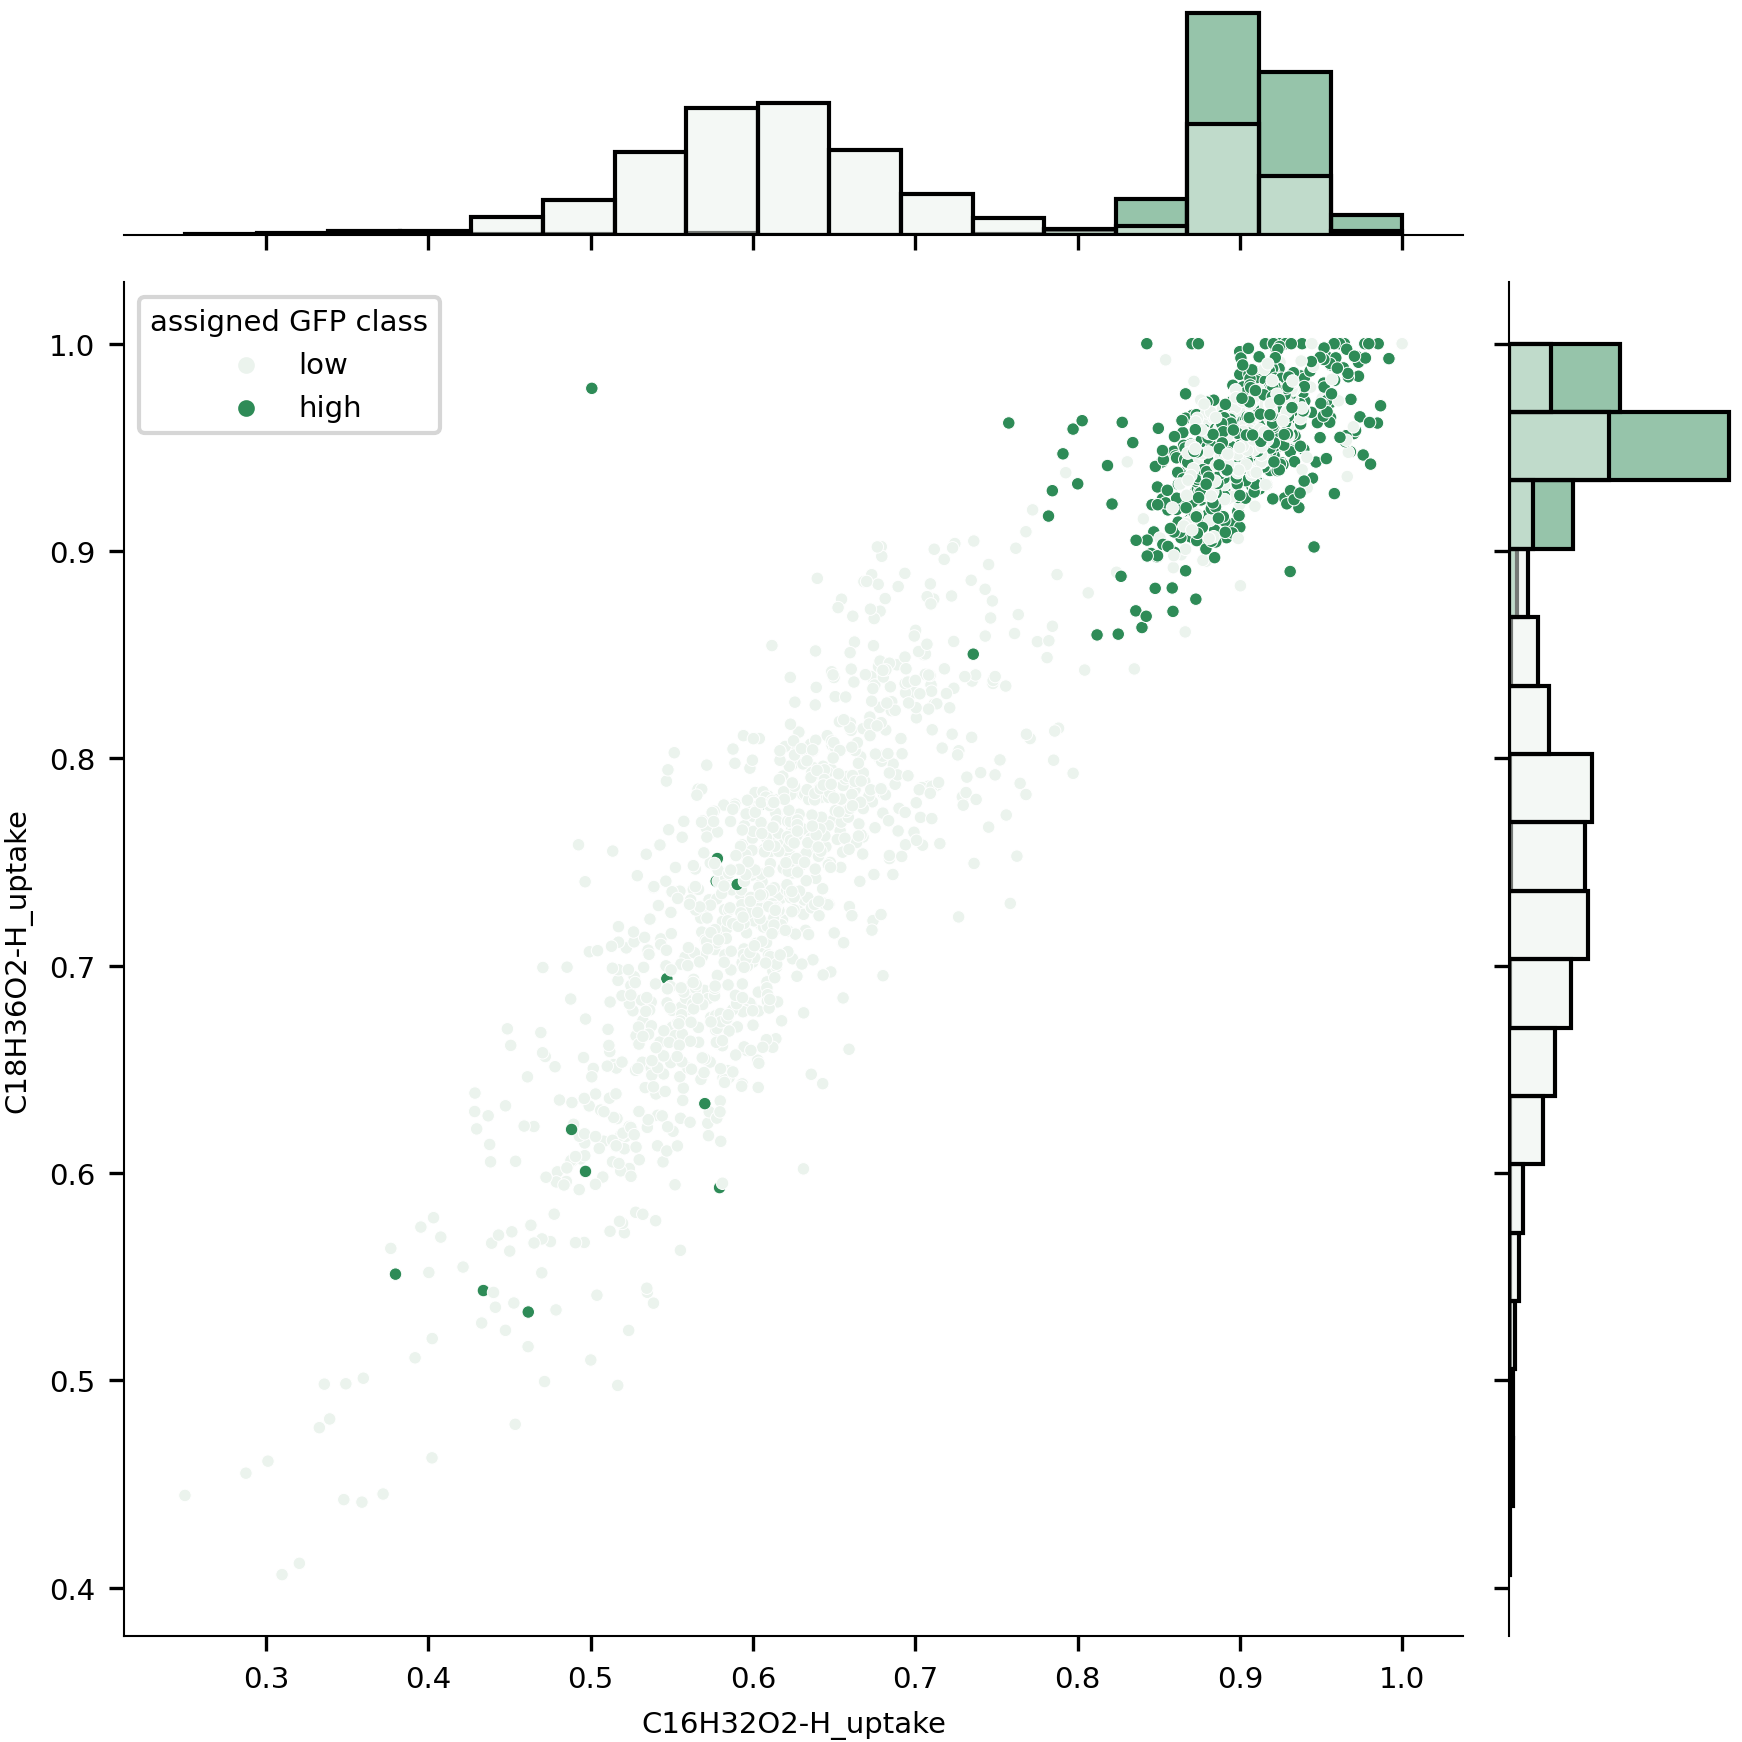

In [10]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

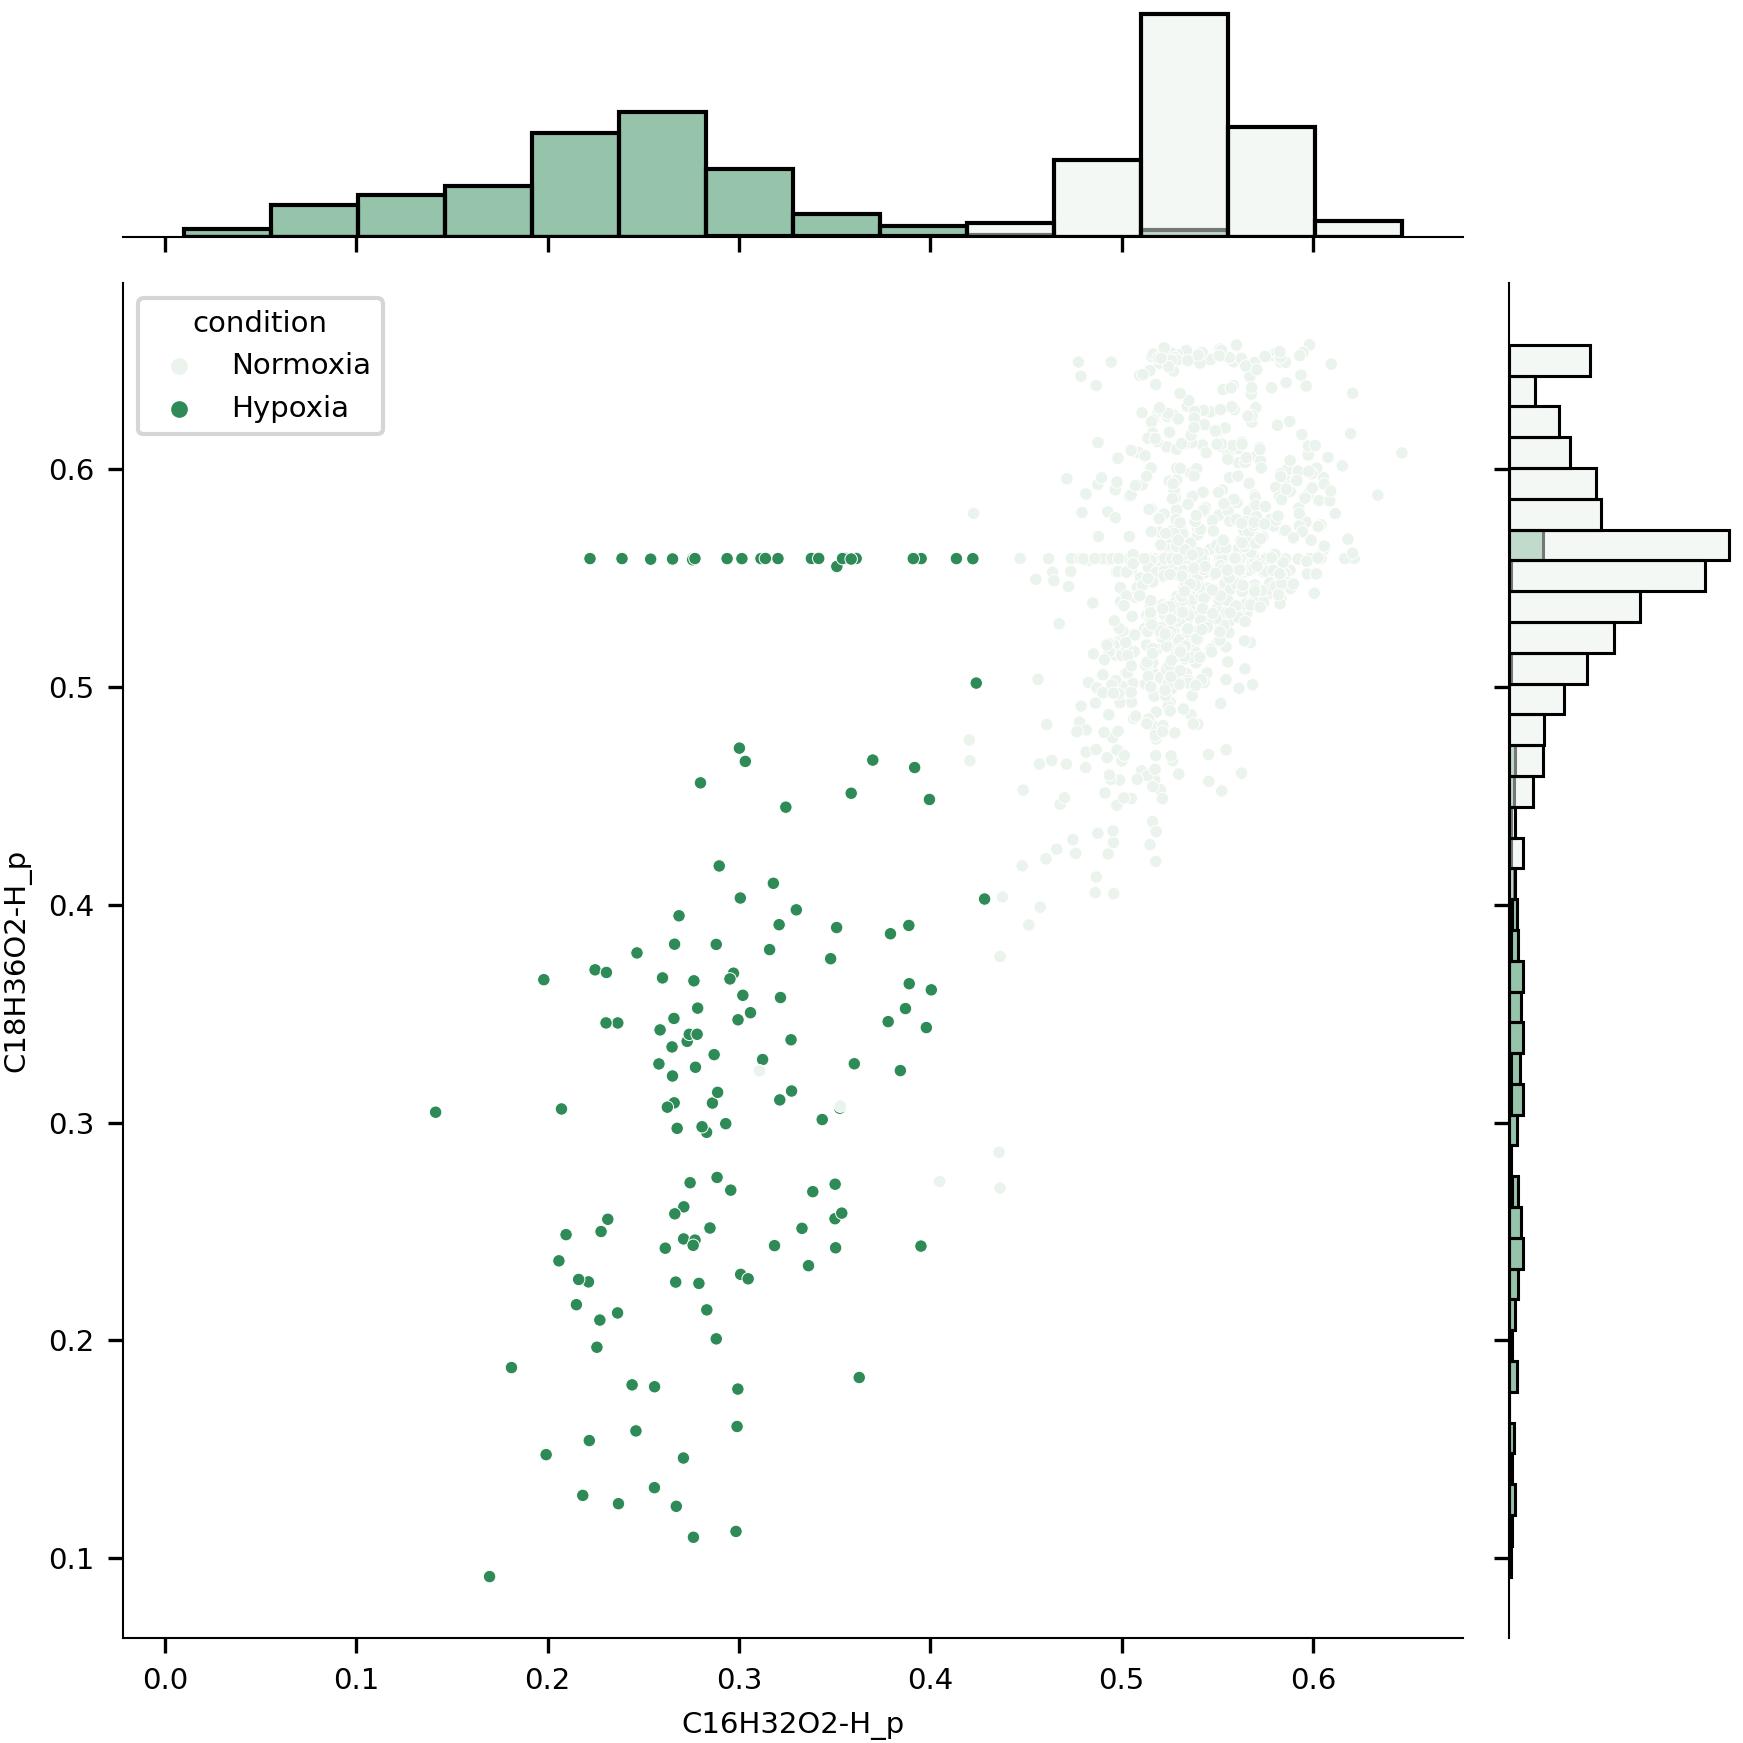

In [11]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_p'
y_col = 'C18H36O2-H_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition", palette=sns.light_palette("seagreen", 2), hue_order=["Normoxia", "Hypoxia"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

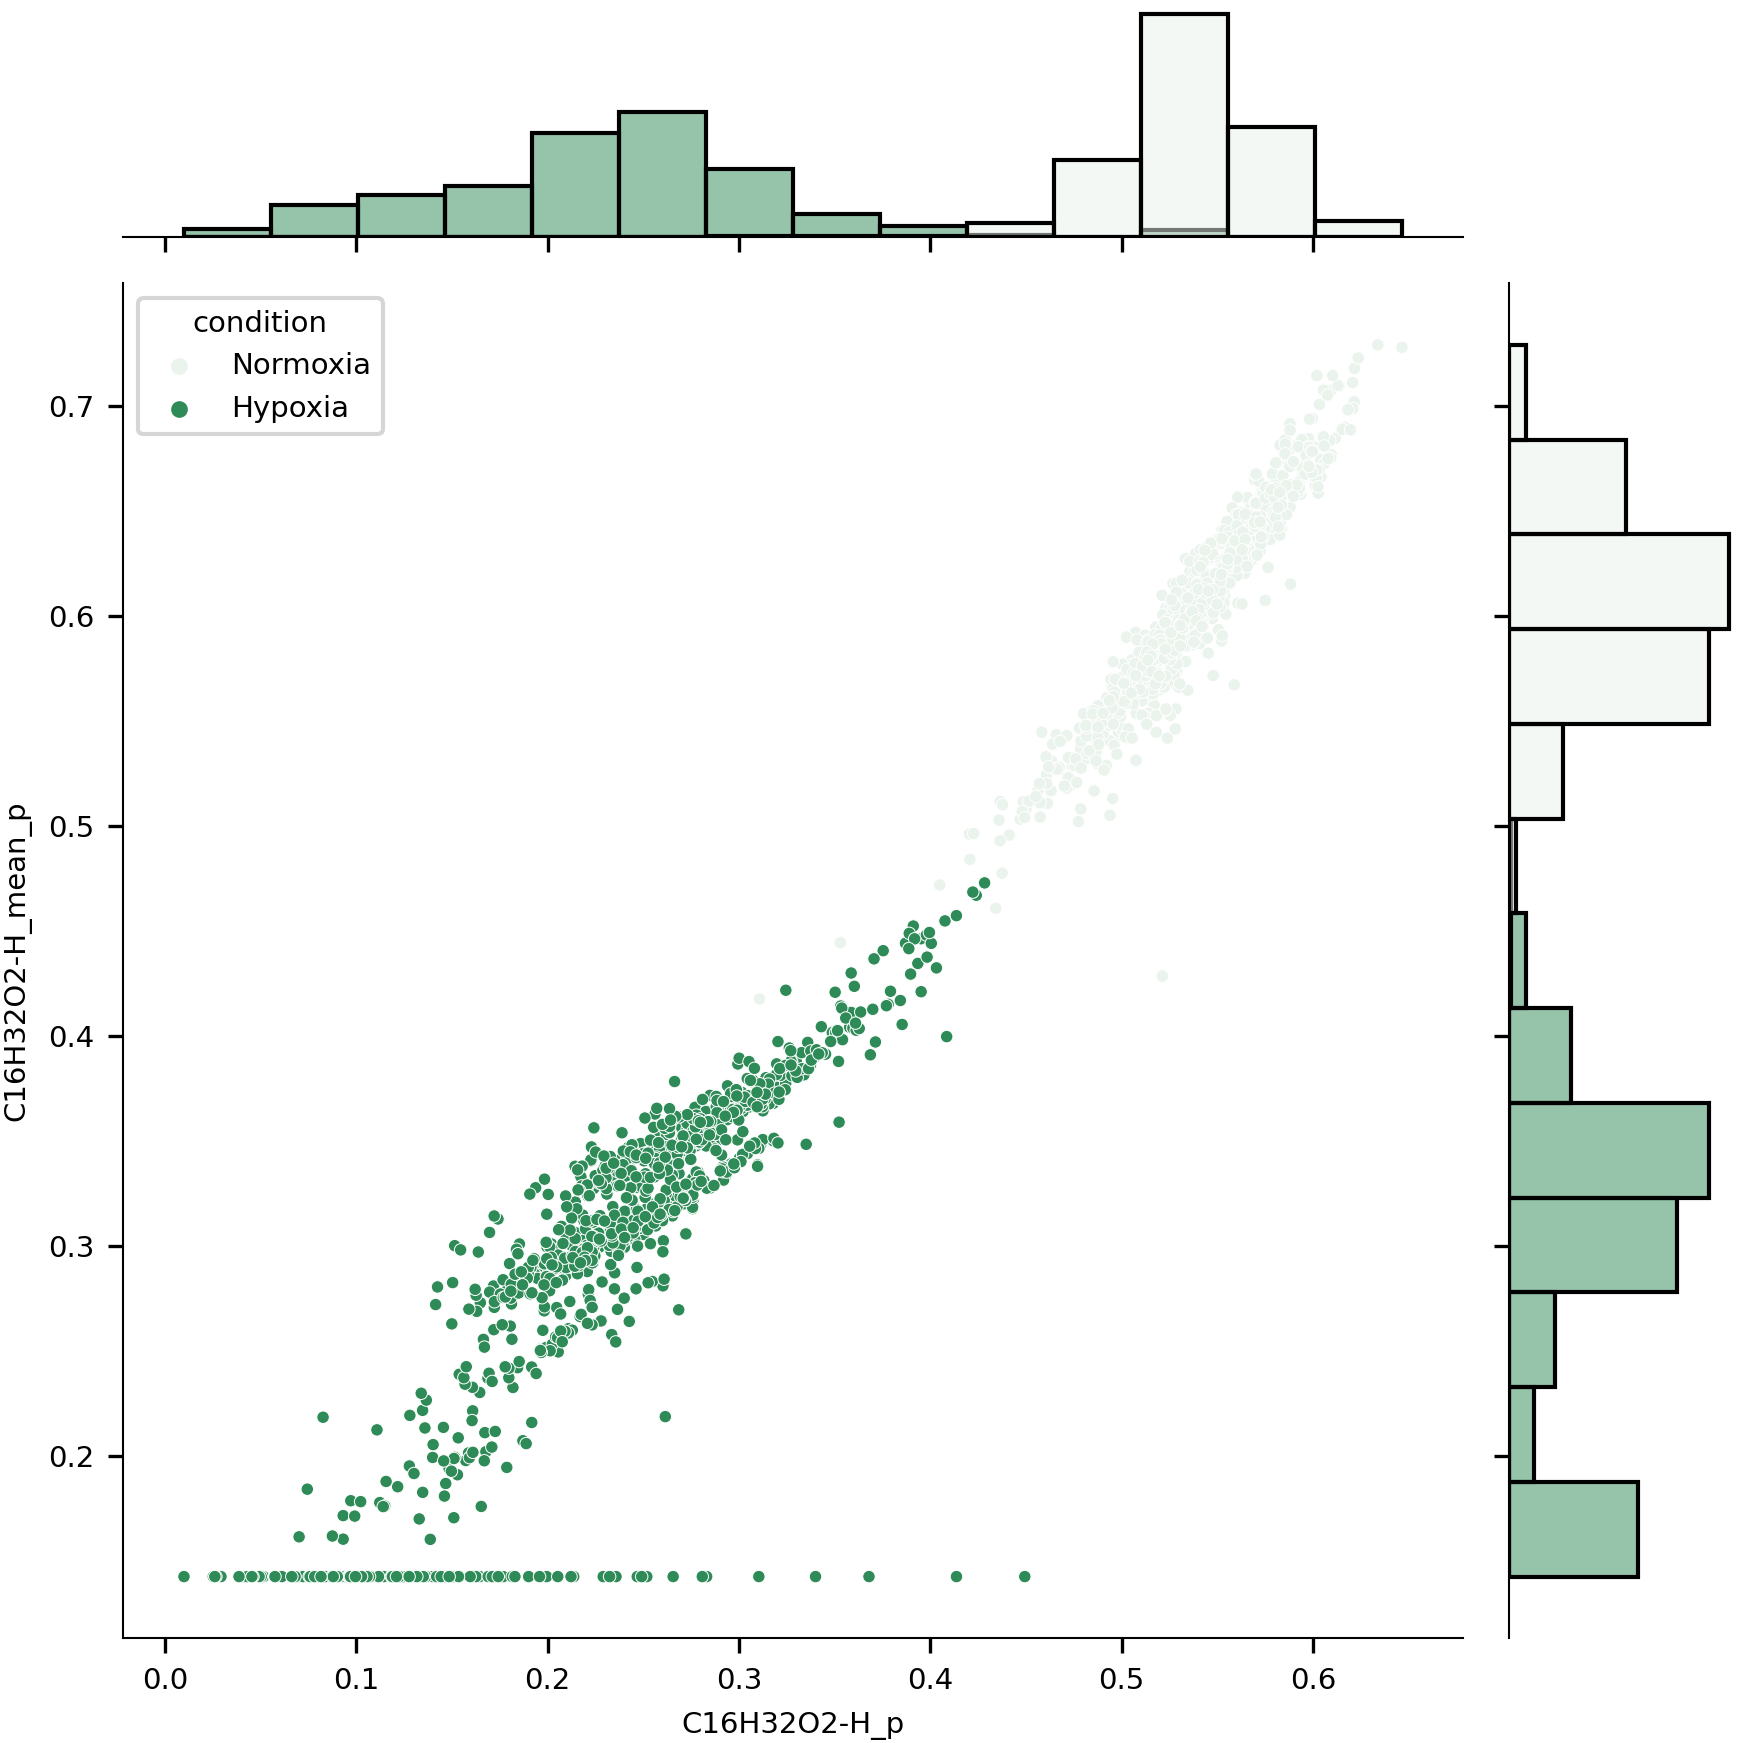

In [12]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_p'
y_col = 'C16H32O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition", palette=sns.light_palette("seagreen", 2), hue_order=["Normoxia", "Hypoxia"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

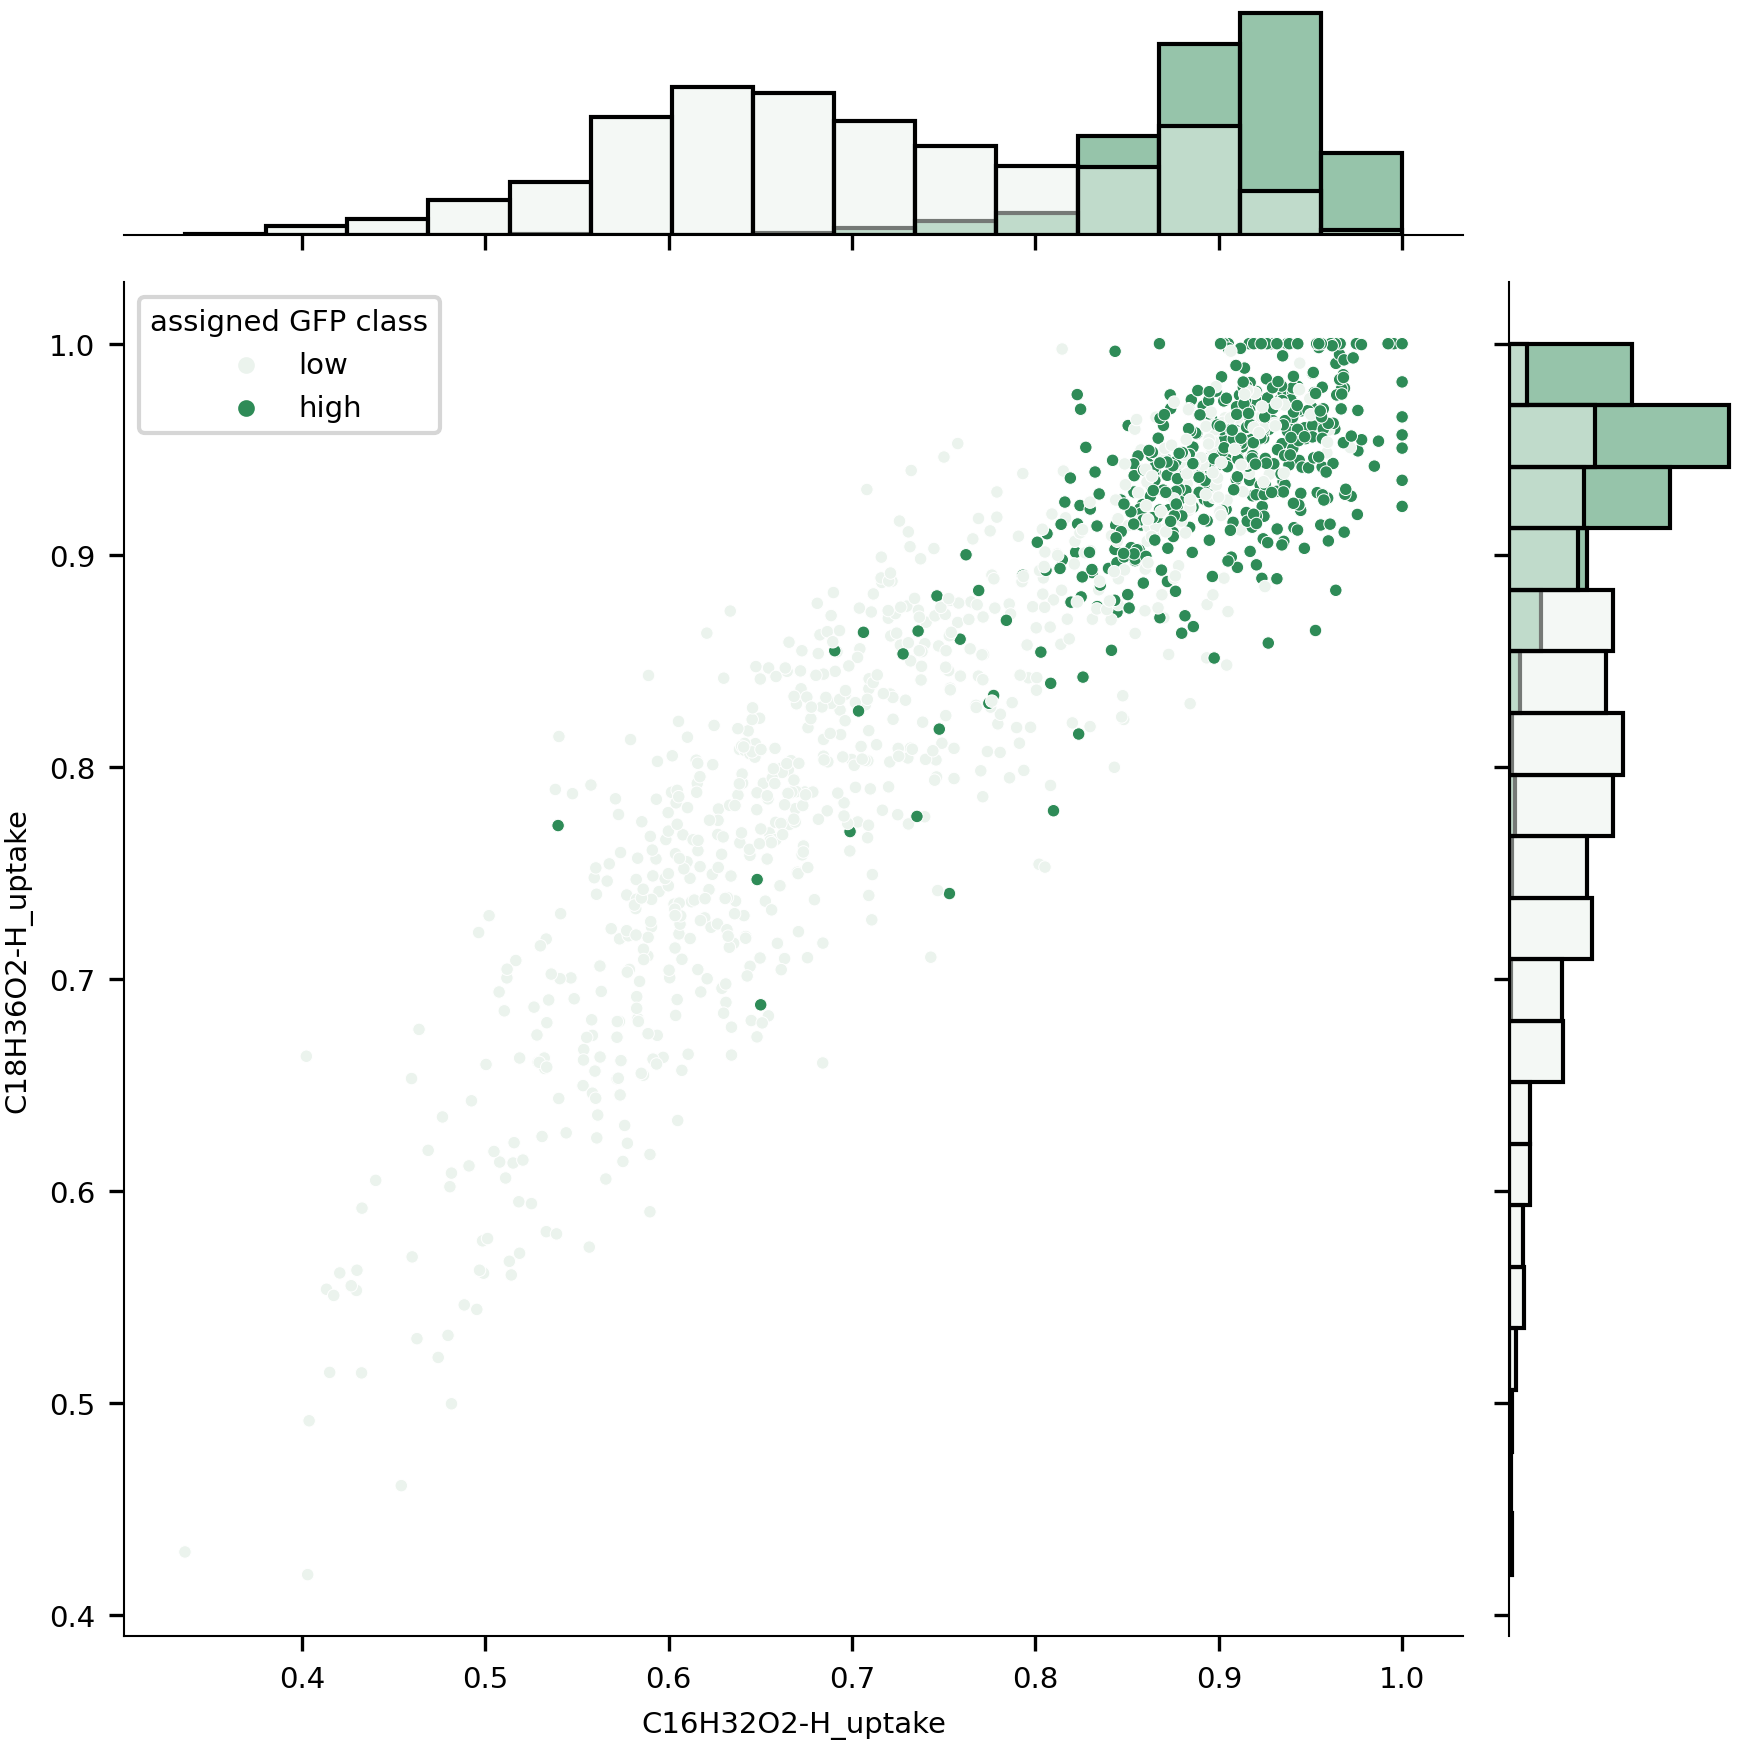

In [13]:
df = adata[(adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.savefig(plots_path / ("mixture_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("mixture_%s_%s.svg"%(x_col, y_col)))

## Plot distributions for individual cells

[1. 0.]


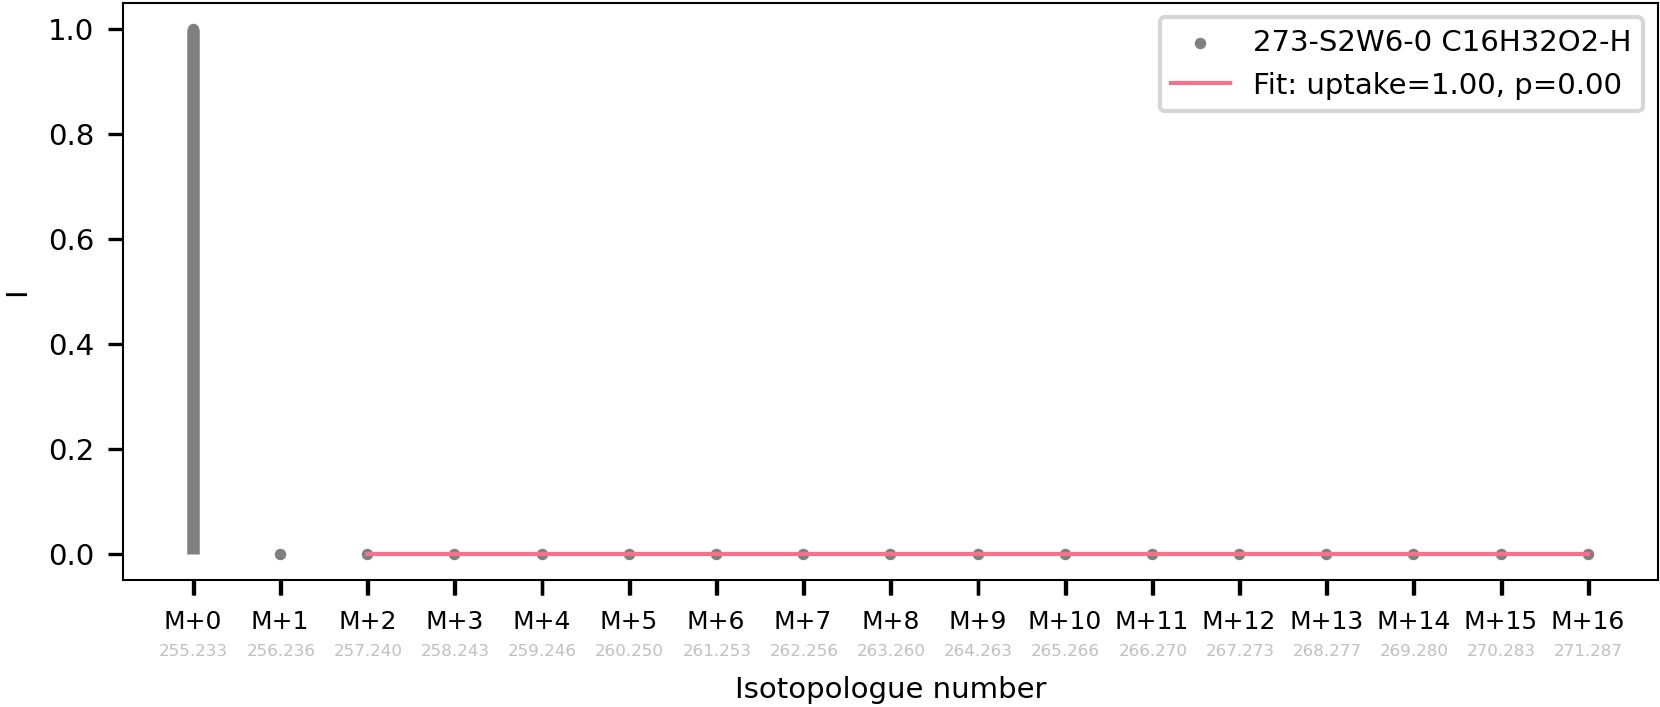

In [14]:
cell_idx = "273-S2W6-0"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}")
ax.legend()

[1. 0.]


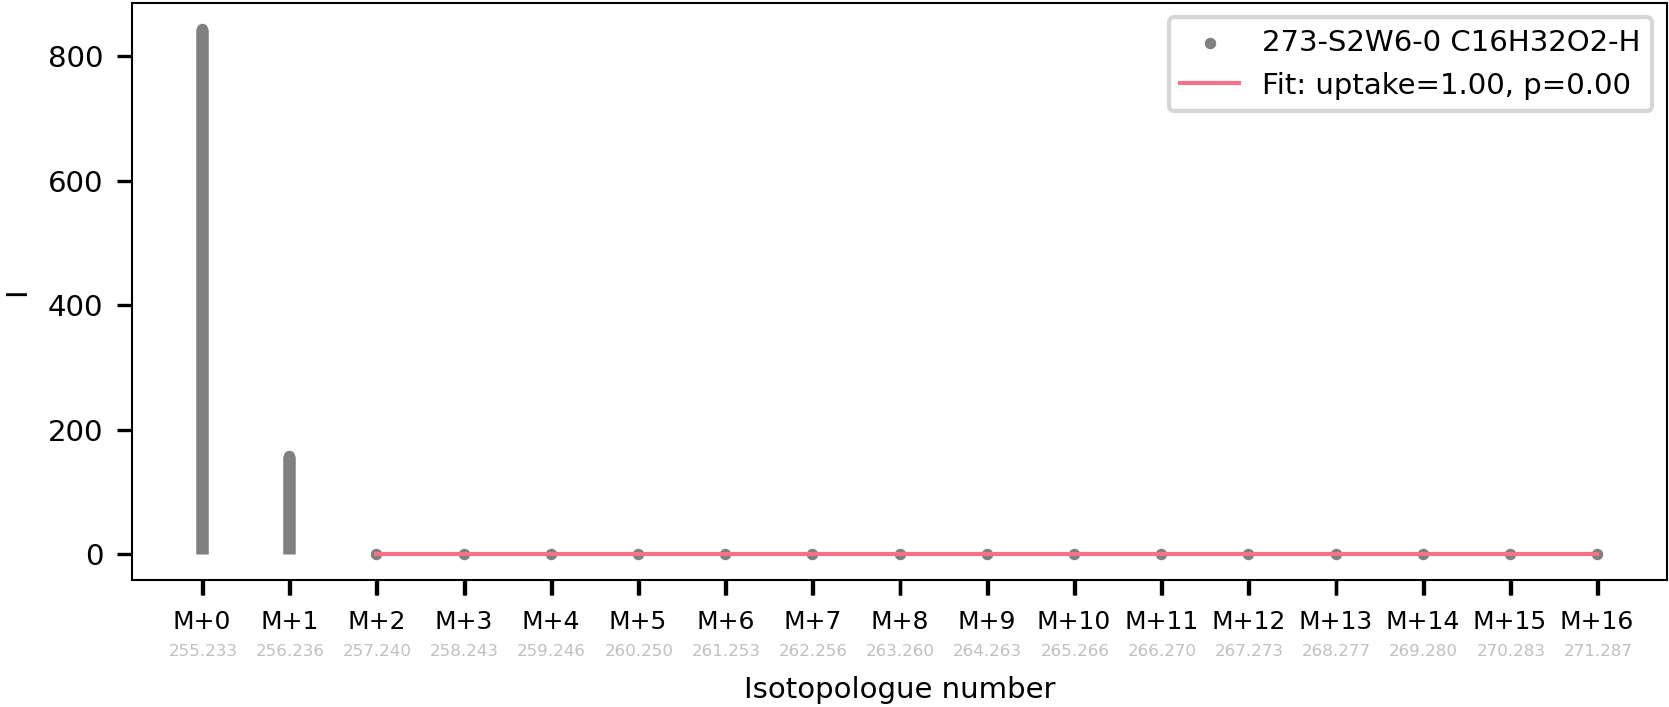

In [15]:
cell_idx = "273-S2W6-0"
ion = 'C16H32O2-H'
layer = "X"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}")
ax.legend()

[0.62753206 0.5470216 ]


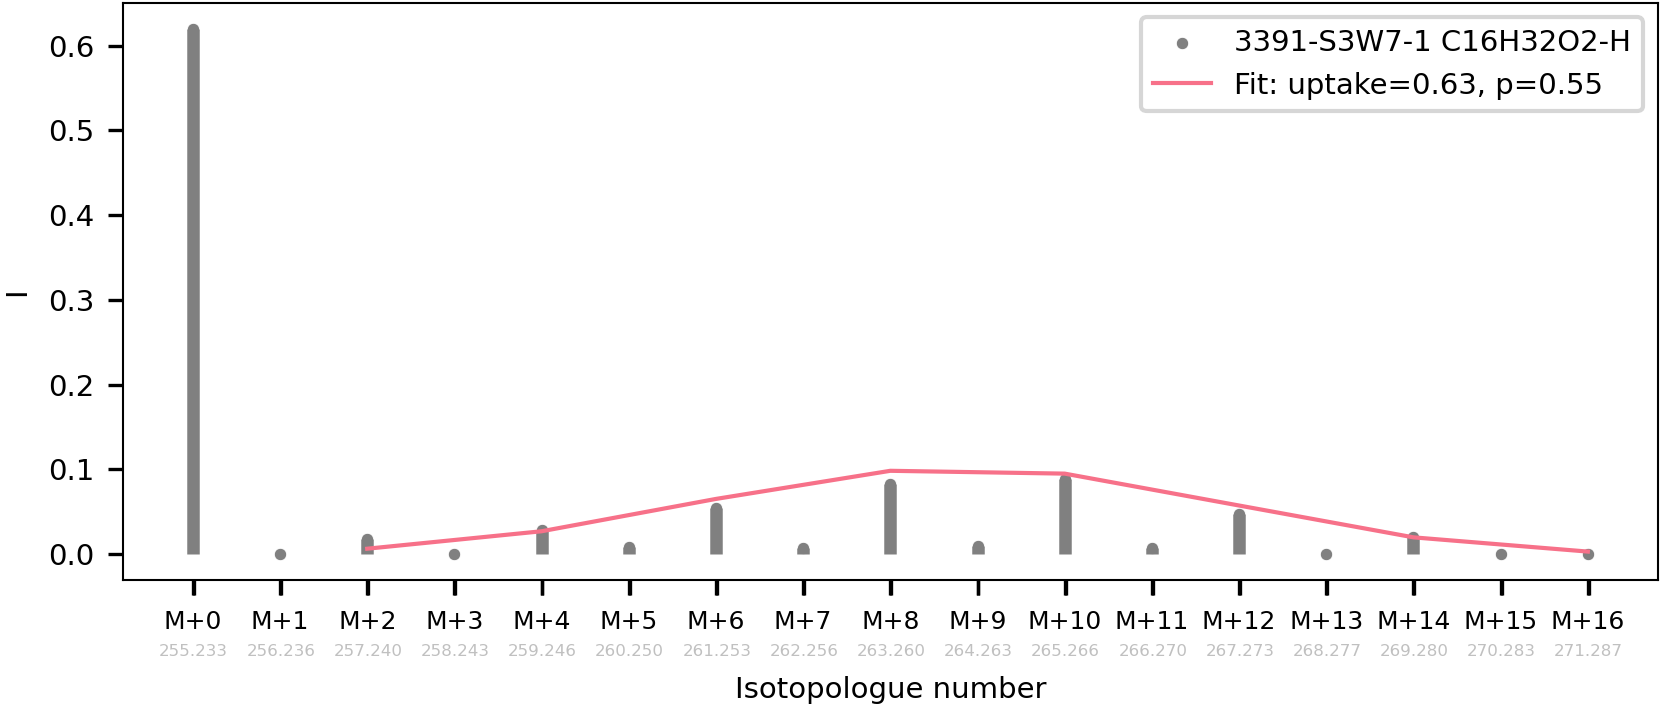

In [16]:
cell_idx = "3391-S3W7-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}")
ax.legend()

[0.91898817 0.25119118]


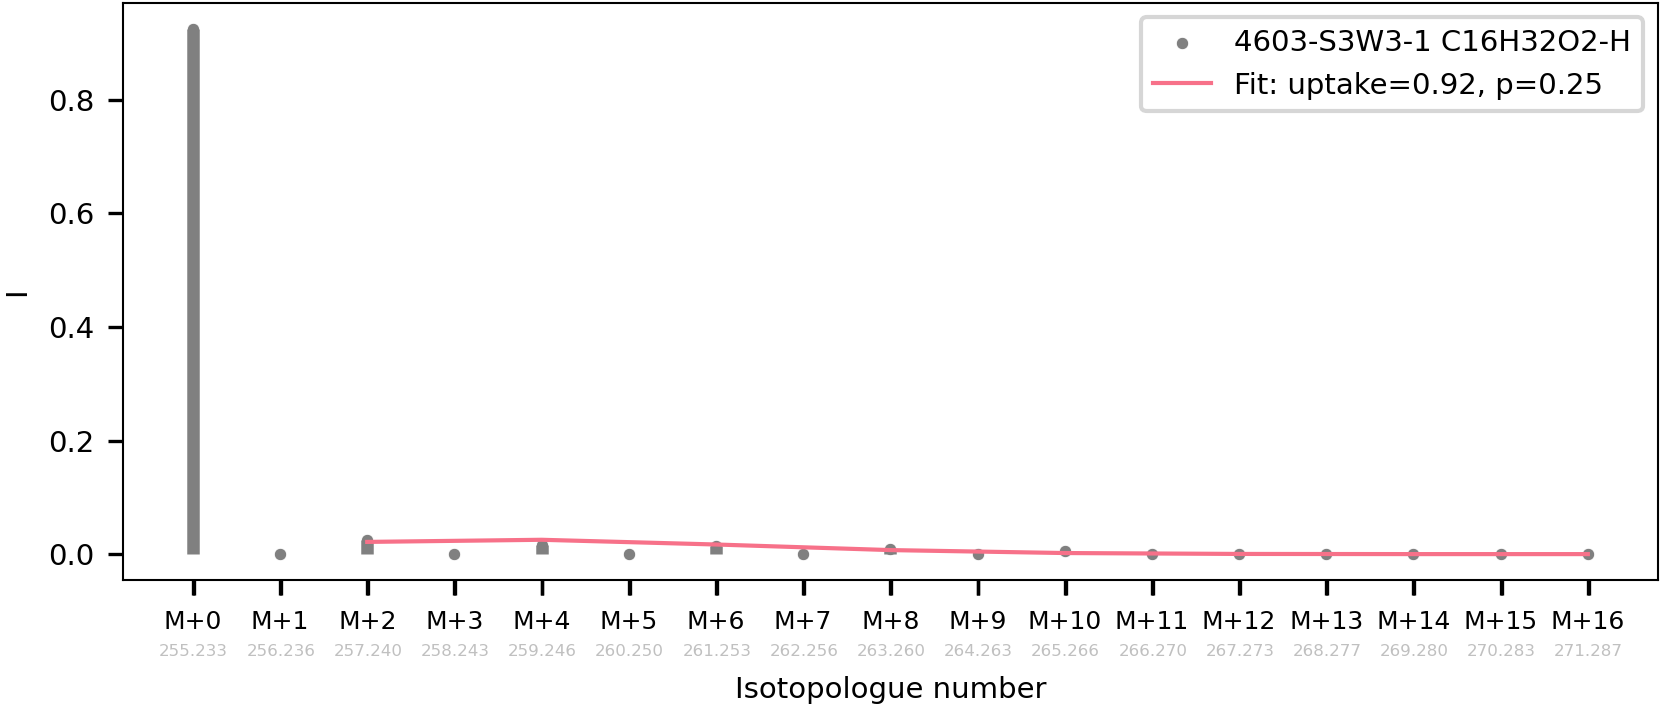

In [17]:
cell_idx = "4603-S3W3-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}")
ax.legend()

[0.91318134 0.07356815 0.02691774]


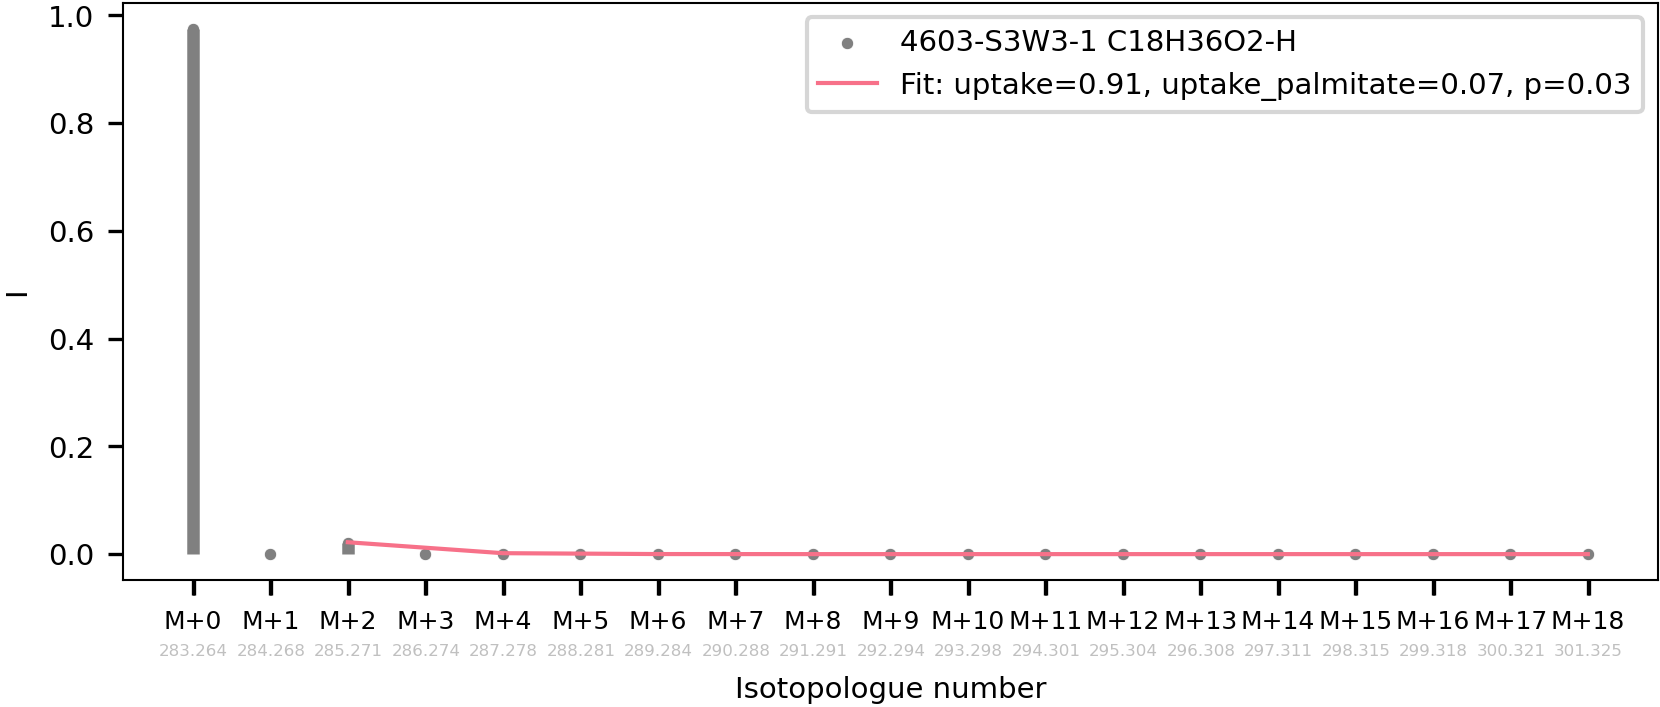

In [18]:
cell_idx = "4603-S3W3-1"
ion = 'C18H36O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C18")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C18(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, uptake_palmitate={param[1]:1.2f}, p={param[2]:1.2f}")
ax.legend()

## Train classifier on uptake values to predict cell state

### Separate wells (predict class assigned based on well's growth conditions)

In [19]:
adata_separate =  adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")]

In [20]:
adata_separate

View of AnnData object with n_obs × n_vars = 2107 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-

### Plot some features for separate wells

In [21]:
adata_separate.obs.condition

cell_id
39-S2W3-0       Hypoxia
42-S2W3-0       Hypoxia
43-S2W3-0       Hypoxia
45-S2W3-0       Hypoxia
47-S2W3-0       Hypoxia
                 ...   
3862-S3W7-1    Normoxia
3863-S3W7-1    Normoxia
3864-S3W7-1    Normoxia
3866-S3W7-1    Normoxia
3954-S3W7-1    Normoxia
Name: condition, Length: 2107, dtype: category
Categories (2, object): ['Hypoxia', 'Normoxia']

In [22]:
adata_separate.obs.condition

cell_id
39-S2W3-0       Hypoxia
42-S2W3-0       Hypoxia
43-S2W3-0       Hypoxia
45-S2W3-0       Hypoxia
47-S2W3-0       Hypoxia
                 ...   
3862-S3W7-1    Normoxia
3863-S3W7-1    Normoxia
3864-S3W7-1    Normoxia
3866-S3W7-1    Normoxia
3954-S3W7-1    Normoxia
Name: condition, Length: 2107, dtype: category
Categories (2, object): ['Hypoxia', 'Normoxia']

In [23]:
adata.obs.condition

cell_id
24-S2W1-0               Normoxia
27-S2W1-0               Normoxia
28-S2W1-0               Normoxia
29-S2W1-0               Normoxia
30-S2W1-0               Normoxia
                     ...        
878-S3W8-1    Hypoxia + Normoxia
881-S3W8-1    Hypoxia + Normoxia
882-S3W8-1    Hypoxia + Normoxia
886-S3W8-1    Hypoxia + Normoxia
888-S3W8-1    Hypoxia + Normoxia
Name: condition, Length: 4291, dtype: category
Categories (3, object): ['Hypoxia', 'Hypoxia + Normoxia', 'Normoxia']

In [24]:
adata.obs.slide

cell_id
24-S2W1-0     2
27-S2W1-0     2
28-S2W1-0     2
29-S2W1-0     2
30-S2W1-0     2
             ..
878-S3W8-1    3
881-S3W8-1    3
882-S3W8-1    3
886-S3W8-1    3
888-S3W8-1    3
Name: slide, Length: 4291, dtype: int64

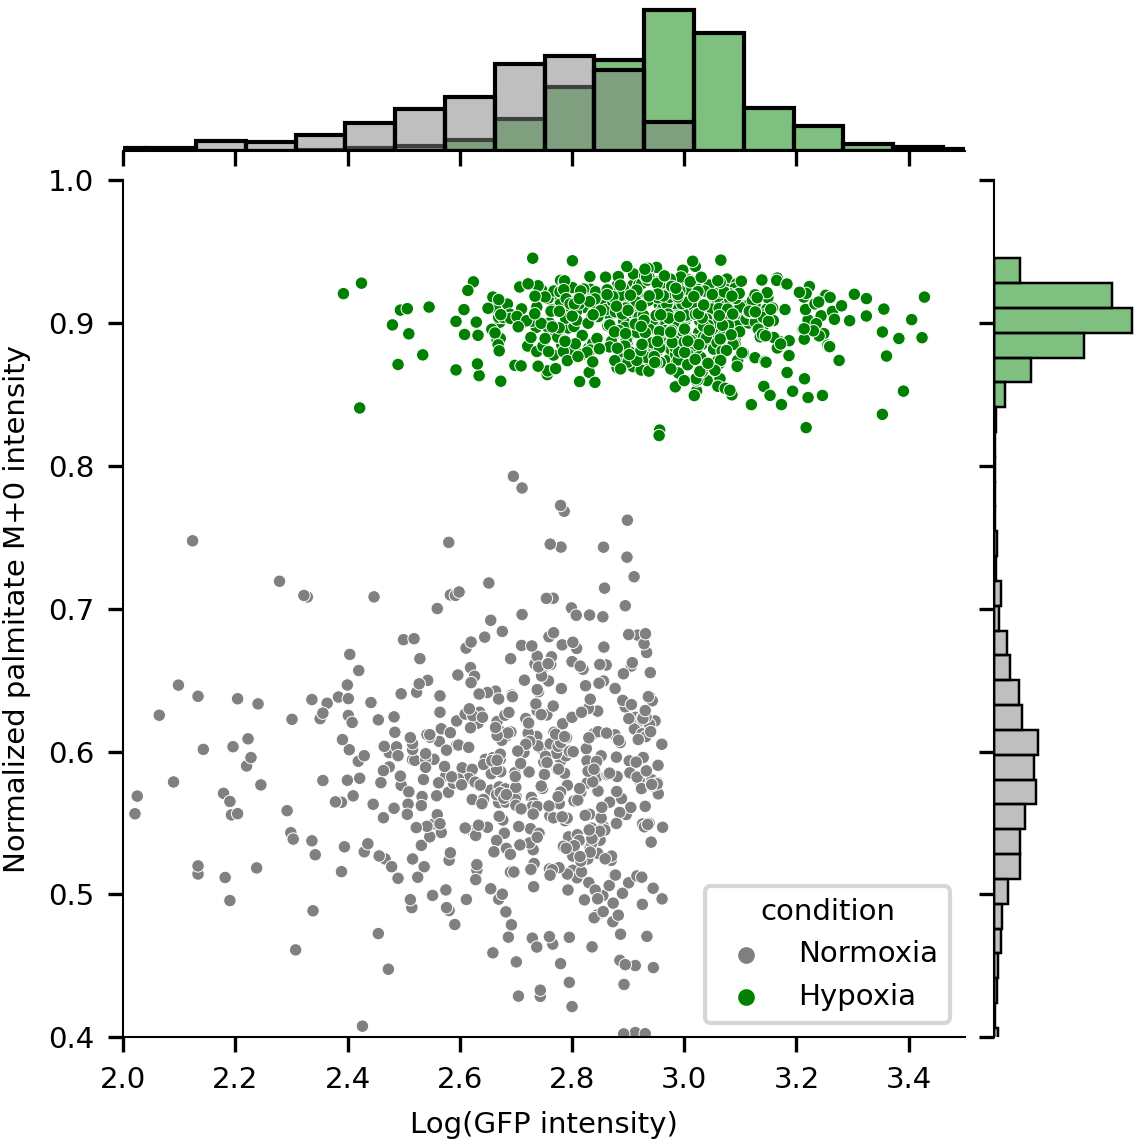

In [25]:
df = adata_separate[adata_separate.obs.slide == 3].obs
x_col = 'log_gfp'
y_col = 'C16H32O2-H_uptake'

# p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='condition', xlim=(2, 3.5), palette=sns.light_palette("seagreen", 2), hue_order=["Normoxia", "Hypoxia"])
p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='condition', ylim=(0.4, 1), xlim=(2, 3.5), palette=["grey", "green"], hue_order=["Normoxia", "Hypoxia"], height=4)
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot, bins=40)
p.set_axis_labels("Log(GFP intensity)", "Normalized palmitate M+0 intensity")
plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

Accuracy:  1.0


/home/buglakova/anaconda3/envs/sciso_env_rep_final/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


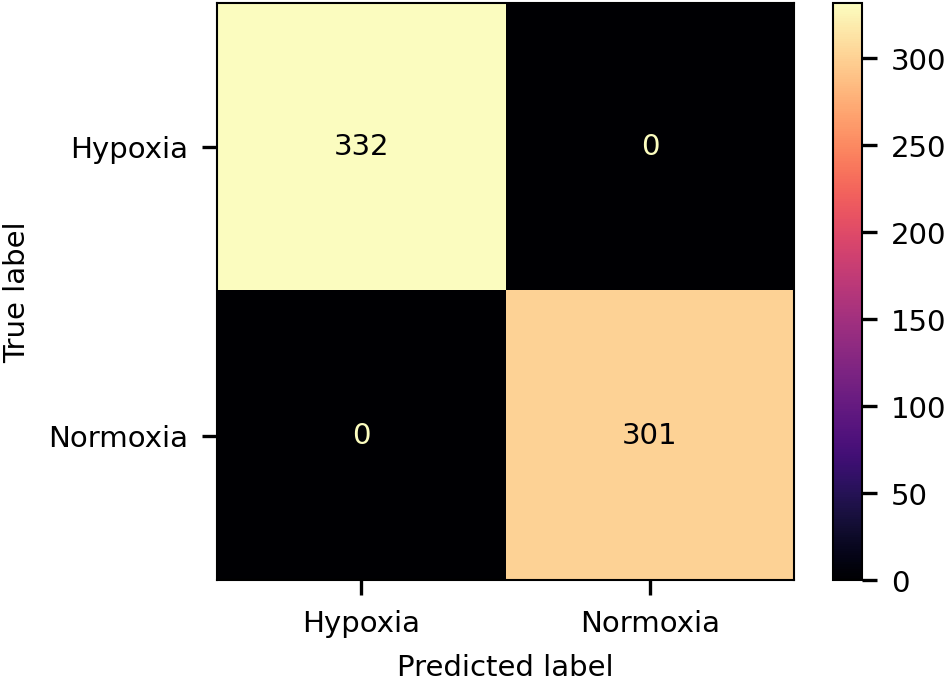

ROC AUC score:  1.0


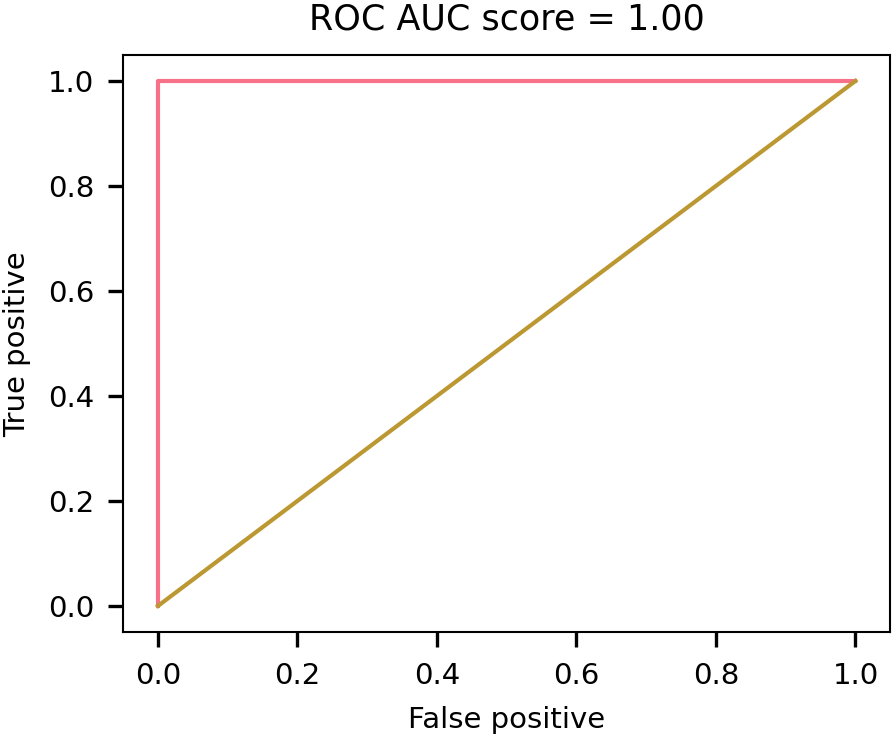

In [26]:
clf = train_classifier(adata_separate, "separate", "Hypoxia", plots_path, "condition")

Accuracy:  0.8436018957345972


/home/buglakova/anaconda3/envs/sciso_env_rep_final/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


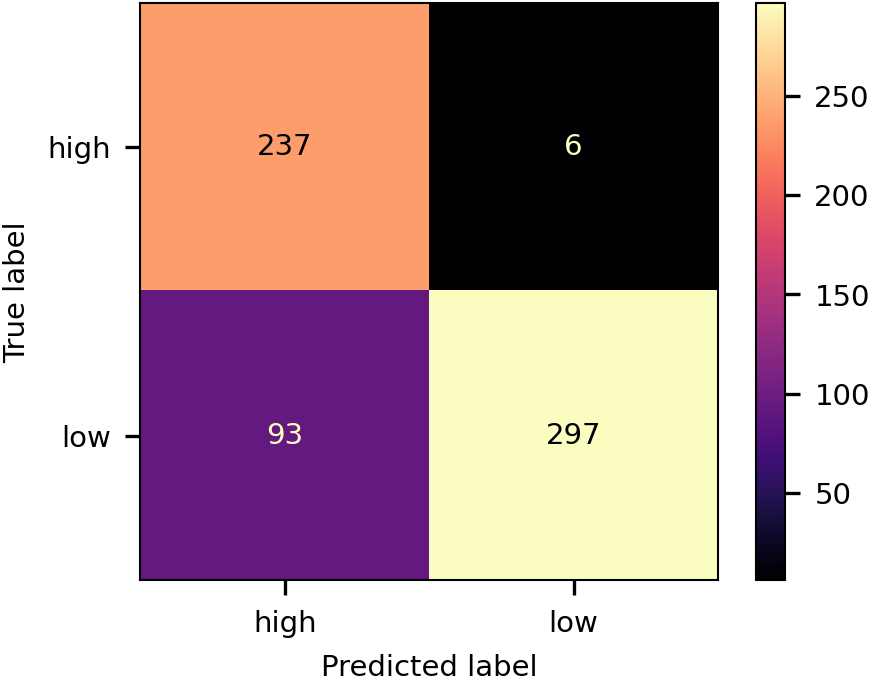

ROC AUC score:  0.8947135169357391


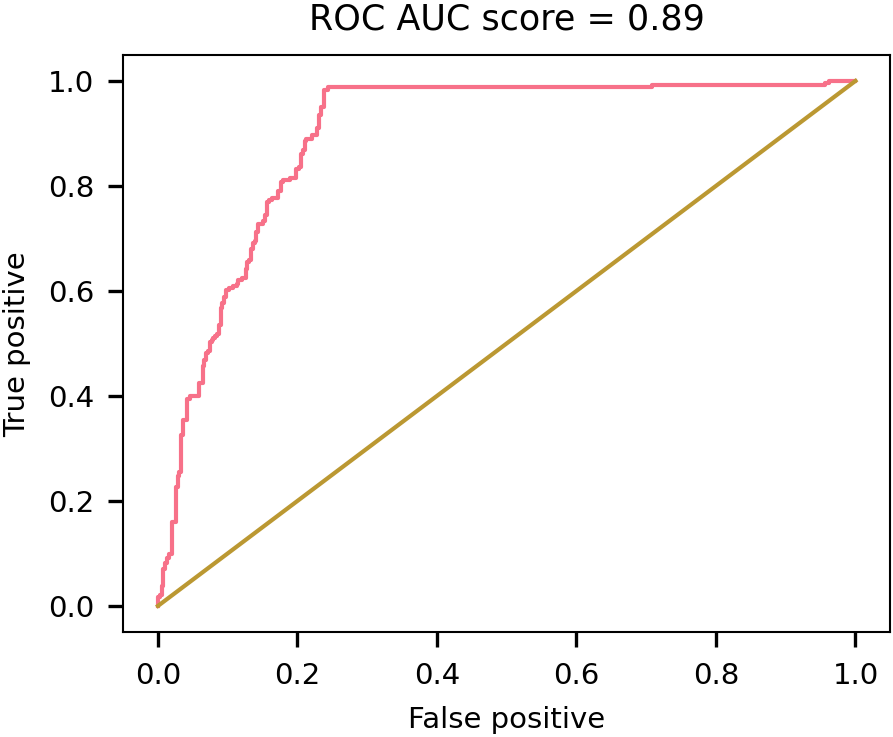

In [27]:
clf = train_classifier(adata_separate, "separate", "high", plots_path, 'assigned GFP class')

In [28]:
adata

AnnData object with n_obs × n_vars = 4291 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-Dapi', '

### Mixture (predict class assigned based on fluorescence)

In [29]:
adata_mix =  adata[(adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")]

In [30]:
adata_mix.obs['assigned GFP class']

cell_id
20-S2W4-0      low
21-S2W4-0     high
22-S2W4-0      low
23-S2W4-0      low
24-S2W4-0     high
              ... 
878-S3W8-1     low
881-S3W8-1     low
882-S3W8-1     low
886-S3W8-1    high
888-S3W8-1     low
Name: assigned GFP class, Length: 1195, dtype: category
Categories (2, object): ['high', 'low']

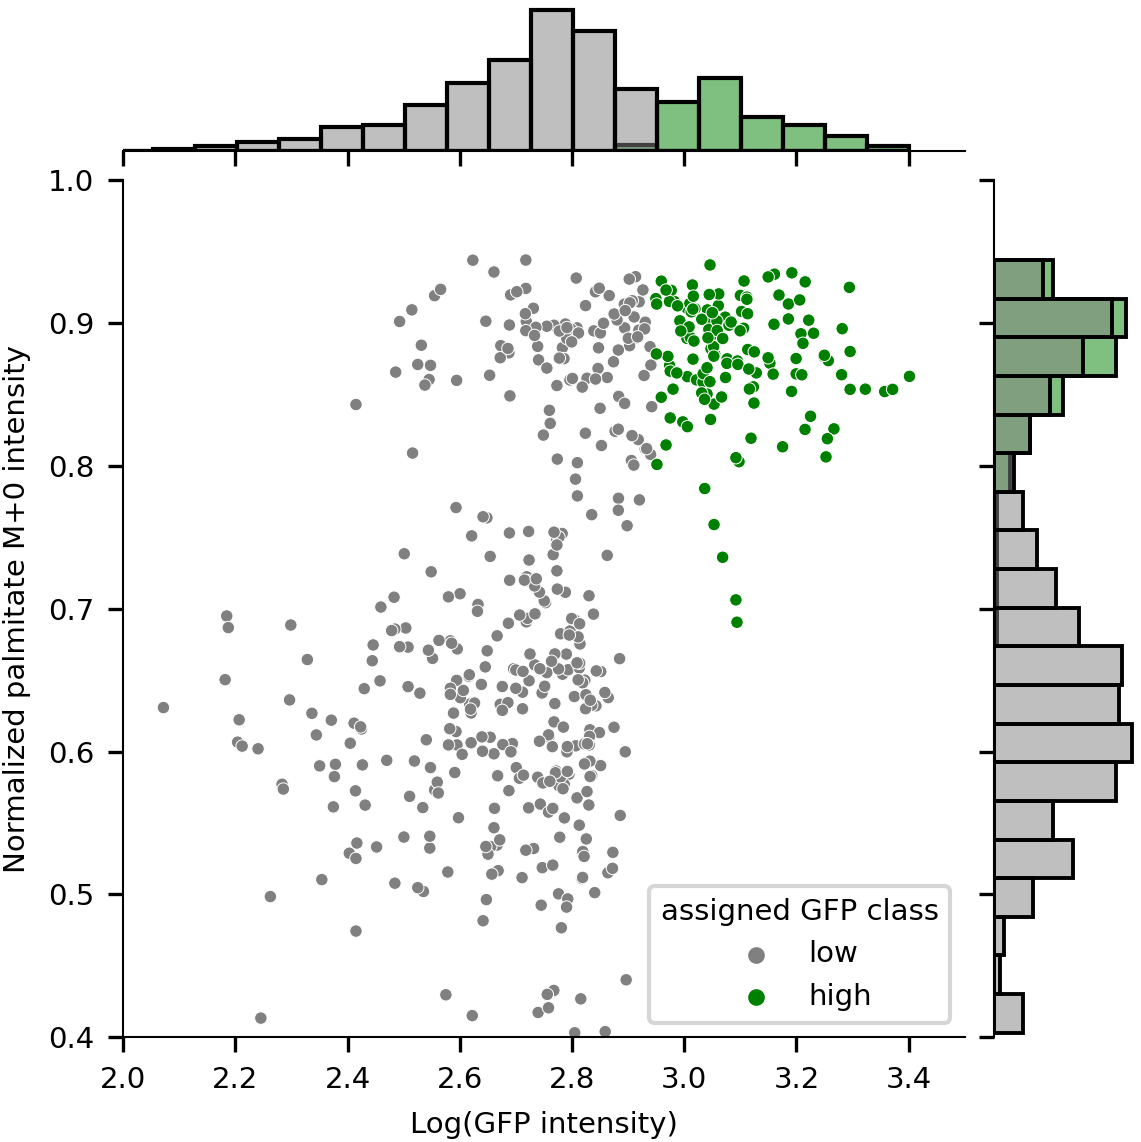

In [31]:
df = adata_mix[adata_mix.obs.slide == 3].obs
x_col = 'log_gfp'
y_col = 'C16H32O2-H_uptake'

# p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='condition', xlim=(2, 3.5), palette=sns.light_palette("seagreen", 2), hue_order=["Normoxia", "Hypoxia"])
p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', ylim=(0.4, 1), xlim=(2, 3.5), palette=["grey", "green"], hue_order=["low", "high"], height=4)
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot, bins=20)
p.set_axis_labels("Log(GFP intensity)", "Normalized palmitate M+0 intensity")
plt.savefig(plots_path / ("mixture_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("mixture_%s_%s.svg"%(x_col, y_col)))

Accuracy:  0.8333333333333334


/home/buglakova/anaconda3/envs/sciso_env_rep_final/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


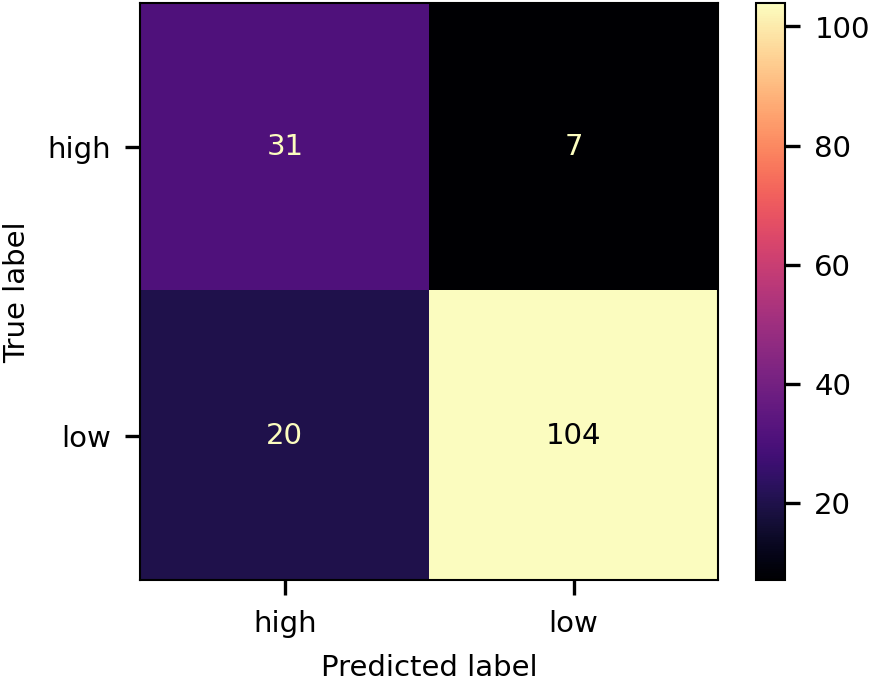

ROC AUC score:  0.8716044142614601


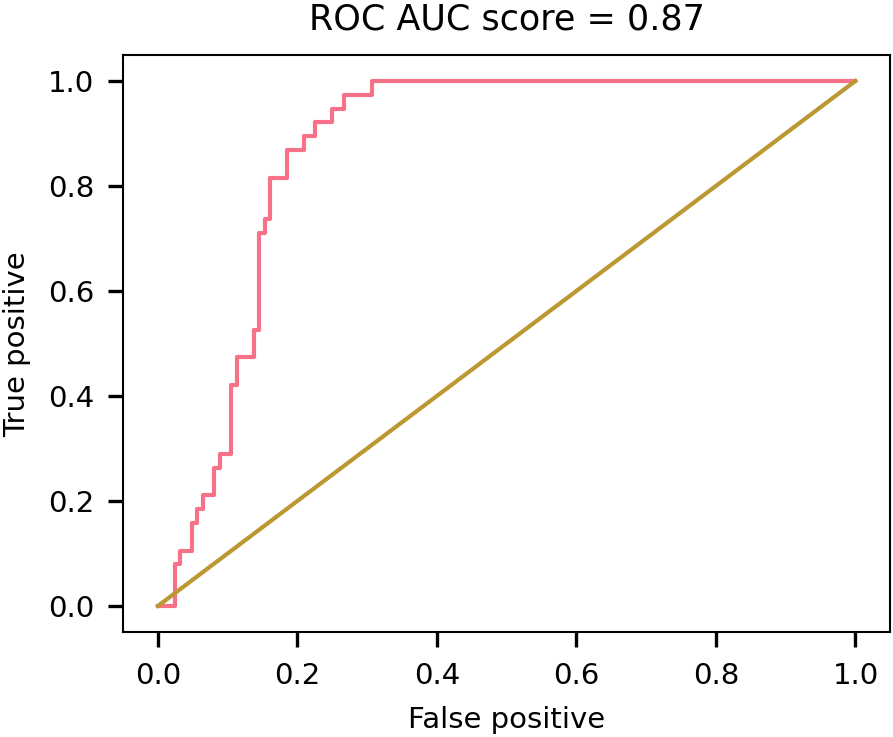

In [32]:
clf = train_classifier(adata_mix[adata_mix.obs.slide == 3], "mix", "high", plots_path, 'assigned GFP class')

In [33]:
y_pred = clf.predict(adata.layers["corr_norm"])
adata.obs["gfp_class_prediction"] = y_pred
adata.obs["correct_prediction"] = (adata.obs['assigned GFP class'] == y_pred).astype(int)

In [34]:
output_file = anndata_dir / "hypoxia_adata_concat_fit.h5ad"
adata.write(output_file.with_suffix(".h5ad"))